In [47]:
import pandas as pd
df1 = pd.read_excel('Barcelona forward line 2024-25 and Rashford.xlsx')
print(df1)

         Player  Minutes played   90s  Goals  Assists  Shots  Shots on target   
0      Rashford            2516  27.9     11        7     68            0.441  \
1  Lamine Yamal            3770  41.8     13       17    164            0.378   
2      Raphinha            5109  56.7     34       21    192            0.422   
3   Lewandowski            4213  46.8     42        2    144            0.479   

      xG  Passes  Passes accurate  ...  Dribbles successful  Duels  Duels won   
0   9.38     838            0.779  ...                0.478    392      0.393  \
1  15.57    1771            0.772  ...                0.552   1007      0.474   
2  23.82    2058            0.770  ...                0.534    619      0.457   
3  39.45     791            0.767  ...                0.434    710      0.348   

   Aerial duels  Aerial duels won  Interceptions  Losses  Losses own half   
0            37             0.351             43     262            0.237  \
1             6             0.167 

Barcelona Forwards vs Rashford – Per 90 Stats Comparison (2024/25)

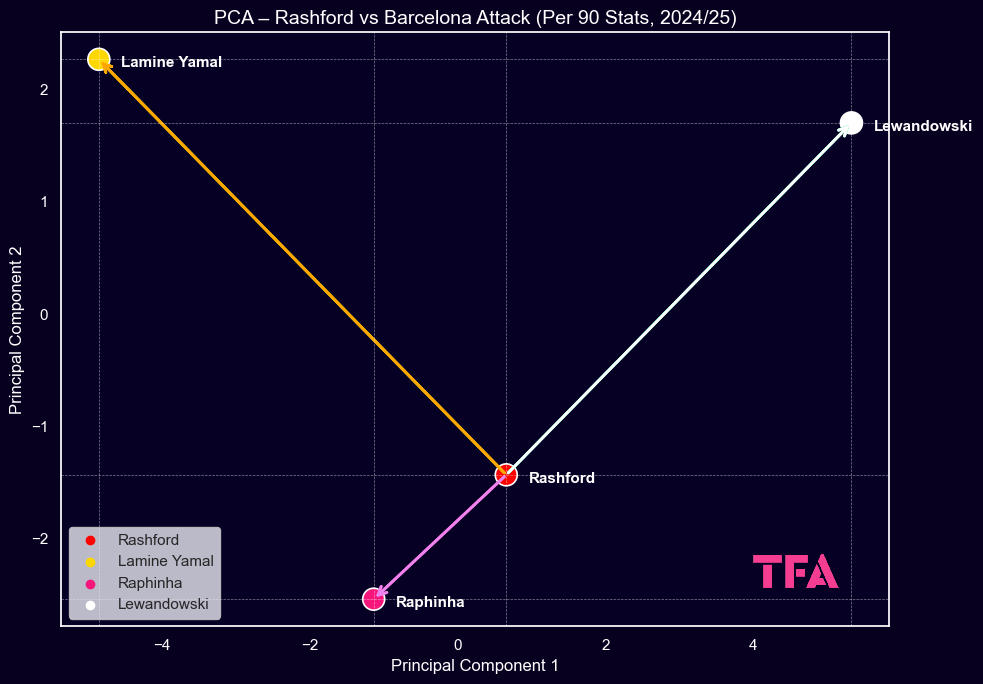

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

data = {
    'Player': ['Rashford', 'Lamine Yamal', 'Raphinha', 'Lewandowski'],
    'Minutes': [2516, 3770, 5109, 4213],
    '90s': [27.9, 41.8, 56.7, 46.8],
    'Goals': [11, 13, 34, 42],
    'Assists': [7, 17, 21, 2],
    'Shots': [68, 164, 192, 144],
    'Shots on target %': [44.1, 37.8, 42.2, 47.9],
    'xG': [9.38, 15.57, 23.82, 39.45],
    'Passes': [838, 1771, 2058, 791],
    'Passes accurate %': [77.9, 77.2, 77.0, 76.7],
    'Long passes': [54, 90, 129, 32],
    'Long passes accurate %': [44.4, 47.8, 55.0, 59.4],
    'Crosses': [70, 150, 194, 15],
    'Crosses accurate %': [35.7, 35.7, 35.7, 35.7],
    'Dribbles': [134, 498, 176, 53],
    'Dribbles successful %': [47.8, 55.2, 53.4, 43.4],
    'Duels': [392, 1007, 619, 710],
    'Duels won %': [39.3, 47.4, 45.7, 34.8],
    'Aerial duels': [37, 6, 35, 166],
    'Aerial duels won %': [35.1, 16.7, 54.3, 42.2],
    'Interceptions': [43, 57, 131, 65],
    'Losses': [262, 566, 623, 442],
    'Losses own half %': [23.7, 14.7, 16.2, 21.9],
    'Recoveries': [75, 133, 174, 115],
    'Recoveries opp. half %': [68, 73.7, 67.2, 69.6]
}

df = pd.DataFrame(data)

per_90_cols = [
    'Goals', 'Assists', 'Shots', 'xG', 'Passes', 'Long passes',
    'Crosses', 'Dribbles', 'Duels', 'Aerial duels', 'Interceptions',
    'Losses', 'Recoveries'
]

for col in per_90_cols:
    df[col + ' per 90'] = df[col] / df['90s']

pca_cols = [col + ' per 90' for col in per_90_cols] + [
    'Shots on target %', 'Passes accurate %', 'Long passes accurate %',
    'Crosses accurate %', 'Dribbles successful %', 'Duels won %',
    'Aerial duels won %', 'Losses own half %', 'Recoveries opp. half %'
]

X = df[pca_cols].copy()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
sns.set(style='dark')
palette = {'Rashford': 'red', 'Lamine Yamal': '#FFD700', 'Raphinha': "#F7177C", 'Lewandowski': '#FFFFFF'}
ax = sns.scatterplot(x='PC1', y='PC2', data=df, hue='Player', palette=palette, s=250, linewidth=1.2)

for i in range(df.shape[0]):
    plt.text(df['PC1'][i]+0.3, df['PC2'][i]-0.07, df['Player'][i], fontsize=11, color='white', weight='bold')

stat_arrows = {
    'Goals': ('Lamine Yamal', 'yellow'),
    'xG': ('Lamine Yamal', 'gold'),
    'Assists': ('Raphinha', '#F73D92'),
    'Passes': ('Raphinha', 'orchid'),
    'Crosses': ('Lamine Yamal', 'orange'),
    'Dribbles': ('Raphinha', 'violet'),
    'Shots': ('Lewandowski', 'lightblue'),
    'Shots on target %': ('Lewandowski', 'cyan'),
    'Interceptions': ('Lewandowski', 'lightgreen'),
    'Recoveries opp. half %': ('Lewandowski', 'white')
}

rashford_coords = df[df['Player'] == 'Rashford'][['PC1', 'PC2']].values[0]
for stat, (target_player, color) in stat_arrows.items():
    target_coords = df[df['Player'] == target_player][['PC1', 'PC2']].values[0]
    arrow = FancyArrowPatch(
        posA=rashford_coords,
        posB=target_coords,
        arrowstyle='->',
        color=color,
        linewidth=2,
        mutation_scale=15
    )
    ax.add_patch(arrow)

plt.gca().set_facecolor("#050024")
plt.gcf().patch.set_facecolor("#07001F")
plt.title('PCA – Rashford vs Barcelona Attack (Per 90 Stats, 2024/25)', fontsize=14, color='white')
plt.xlabel('Principal Component 1', color='white')
plt.ylabel('Principal Component 2', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(loc='lower left', frameon=True)
plt.tight_layout()

for i in range(df.shape[0]):
    x = df['PC1'][i]
    y = df['PC2'][i]
    ax.axhline(y=y, color='white', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=x, color='white', linestyle='--', linewidth=0.5, alpha=0.5)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.851, 0.081), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    plt.gca().add_artist(ab)

plt.show()

Attacking metrics for Marcus Rashford during the 2024/25 season

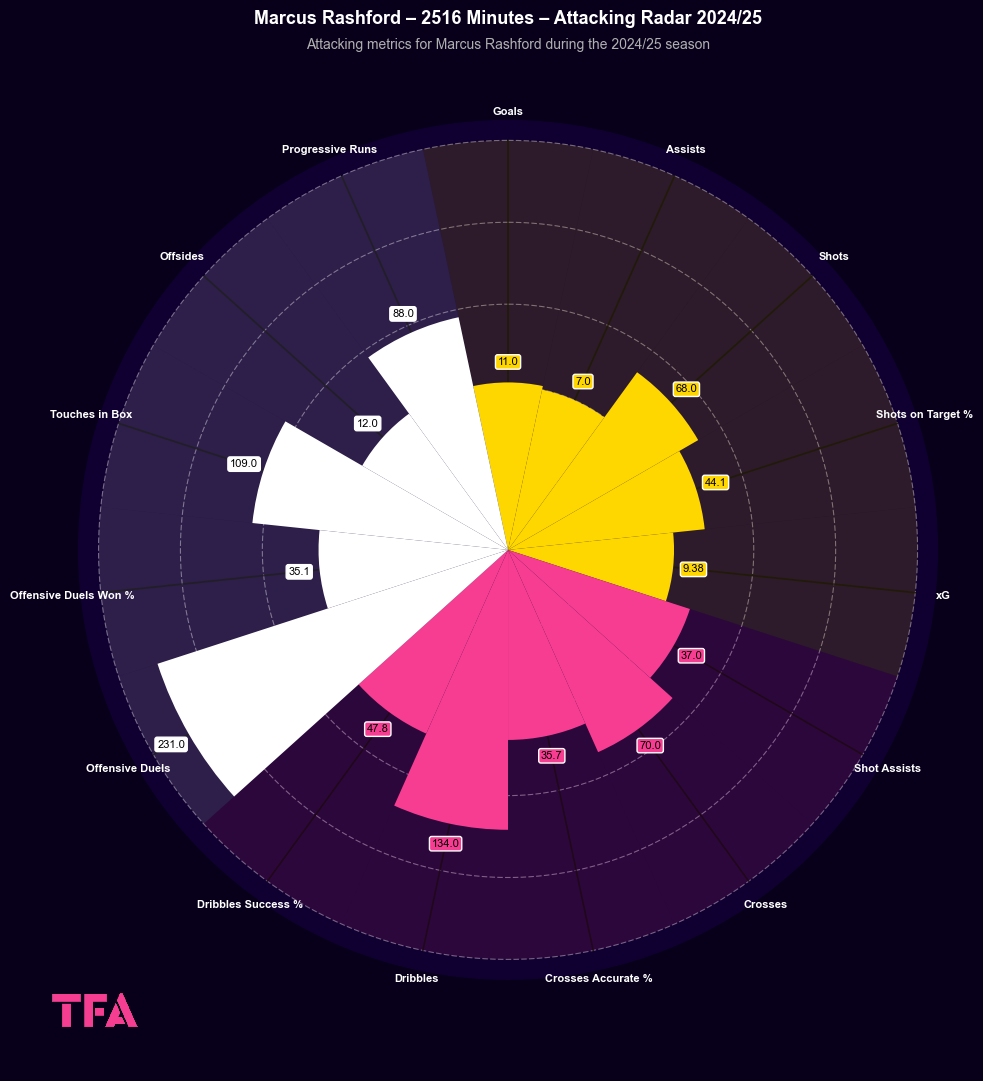

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Goals", "Assists", "Shots", "Shots on Target %", "xG",
        "Shot Assists", "Crosses", "Crosses Accurate %",
        "Dribbles", "Dribbles Success %", "Offensive Duels",
        "Offensive Duels Won %", "Touches in Box", "Offsides", "Progressive Runs"
    ],
    "Value": [
        11, 7, 68, 44.10, 9.38,
        37, 70, 35.70,
        134, 47.80, 231,
        35.10, 109, 12, 88
    ]
}

df = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFD700"] * block_size +
    ["#F73D92"] * block_size +
    ["#FFFFFF"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Marcus Rashford – 2516 Minutes – Attacking Radar 2024/25",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Attacking metrics for Marcus Rashford during the 2024/25 season",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Defensive metrics for Marcus Rashford during the 2024/25 season

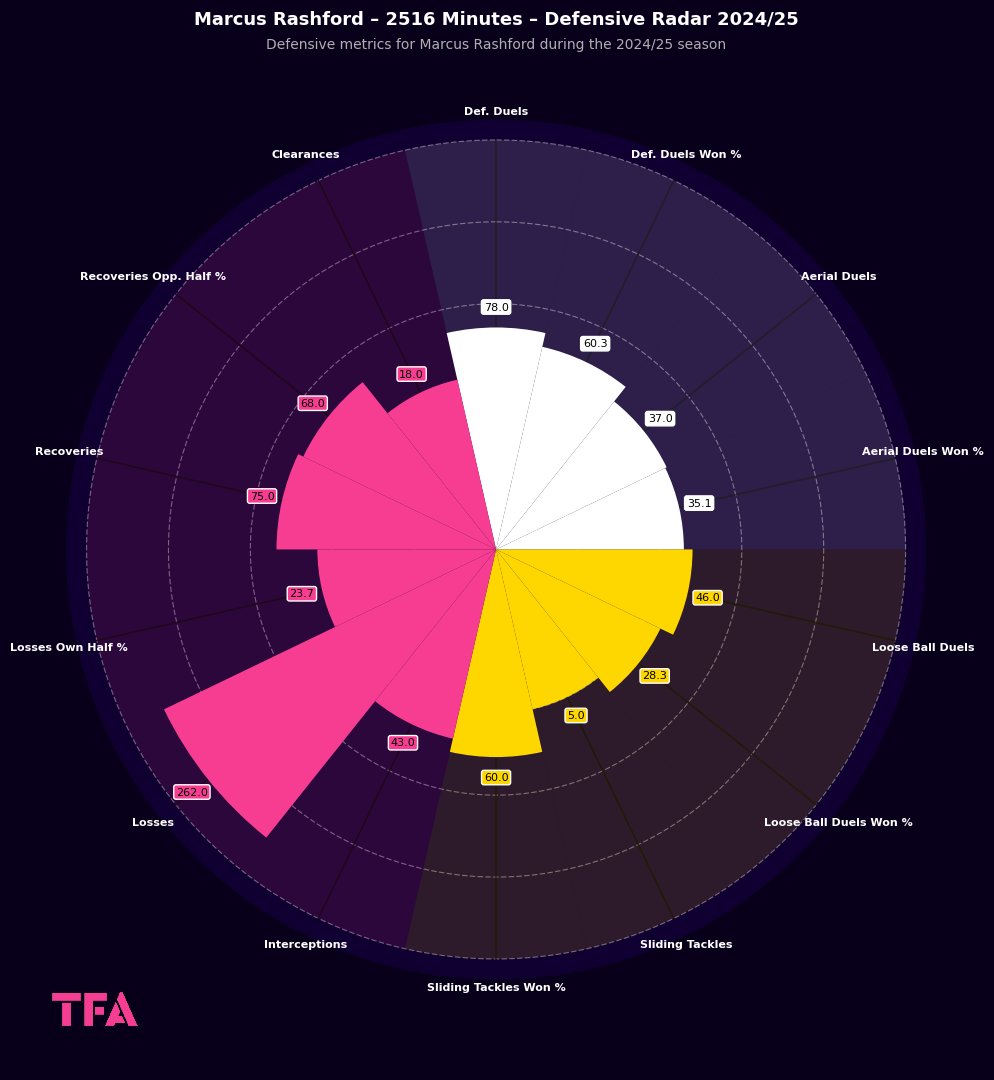

In [17]:

data = {
    "Metric": [
        "Def. Duels", "Def. Duels Won %", "Aerial Duels", "Aerial Duels Won %",
        "Loose Ball Duels", "Loose Ball Duels Won %", "Sliding Tackles",
        "Sliding Tackles Won %", "Interceptions", "Losses",
        "Losses Own Half %", "Recoveries", "Recoveries Opp. Half %", "Clearances"
    ],
    "Value": [
        78, 60.30, 37, 35.10,
        46, 28.30, 5,
        60.0, 43, 262,
        23.70, 75, 68.0, 18
    ]
}

df = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFFFFF"] * block_size +   
    ["#FFD700"] * block_size +   
    ["#F73D92"] * (len(df) - 2 * block_size) 
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Marcus Rashford – 2516 Minutes – Defensive Radar 2024/25",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Defensive metrics for Marcus Rashford during the 2024/25 season",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()


Passing & progression metrics for Marcus Rashford during the 2024/25 season

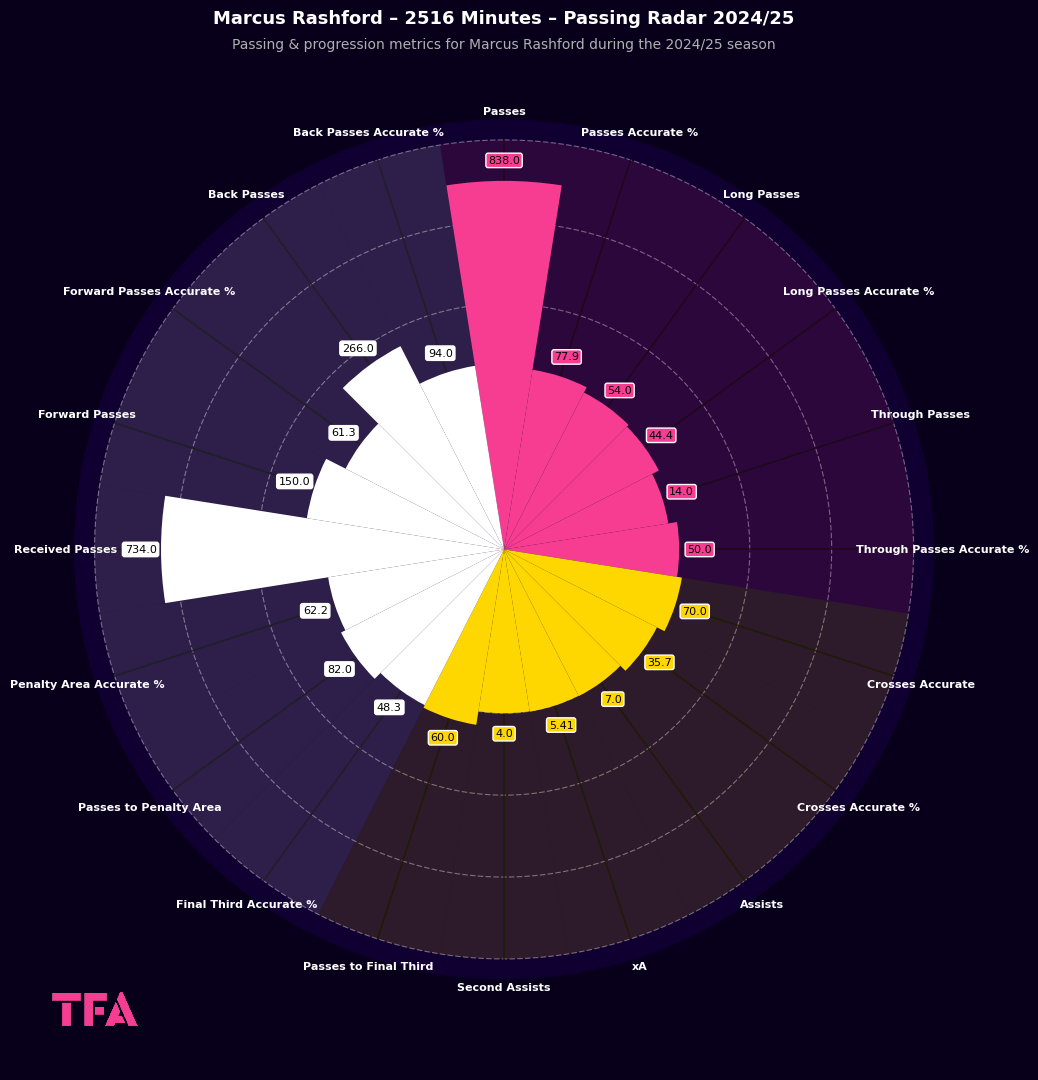

In [16]:

data = {
    "Metric": [
        "Passes", "Passes Accurate %", "Long Passes", "Long Passes Accurate %",
        "Through Passes", "Through Passes Accurate %", "Crosses Accurate", "Crosses Accurate %",
        "Assists", "xA", "Second Assists", "Passes to Final Third", "Final Third Accurate %",
        "Passes to Penalty Area", "Penalty Area Accurate %", "Received Passes",
        "Forward Passes", "Forward Passes Accurate %", "Back Passes", "Back Passes Accurate %"
    ],
    "Value": [
        838, 77.90, 54, 44.40,
        14, 50.0, 70, 35.70,
        7, 5.41, 4, 60, 48.30,
        82, 62.20, 734,
        150, 61.30, 266, 94.0
    ]
}

df = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#F73D92"] * block_size +     
    ["#FFD700"] * block_size +     
    ["#FFFFFF"] * (len(df) - 2 * block_size) 
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Marcus Rashford – 2516 Minutes – Passing Radar 2024/25",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Passing & progression metrics for Marcus Rashford during the 2024/25 season",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Performance metrics for Marcus Rashford when playing as a left winger in 2024/25

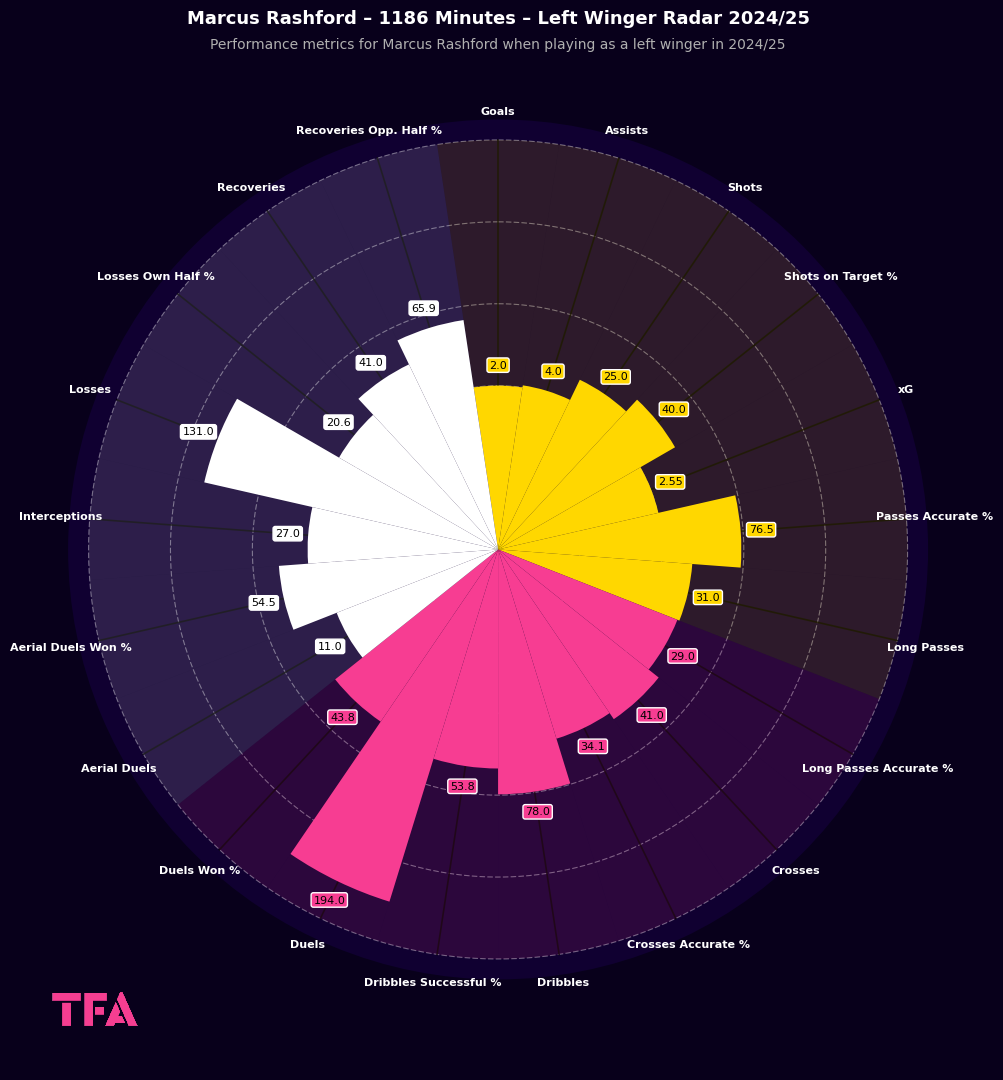

In [15]:

data = {
    "Metric": [
        "Goals", "Assists", "Shots",
        "Shots on Target %", "xG", "Passes Accurate %",
        "Long Passes", "Long Passes Accurate %", "Crosses", "Crosses Accurate %",
        "Dribbles", "Dribbles Successful %", "Duels", "Duels Won %",
        "Aerial Duels", "Aerial Duels Won %", "Interceptions", "Losses",
        "Losses Own Half %", "Recoveries", "Recoveries Opp. Half %"
    ],
    "Value": [
        2, 4, 25,
        40.0, 2.55, 76.50,
        31, 29.0, 41, 34.10,
        78, 53.80, 194, 43.80,
        11, 54.50, 27, 131,
        20.60, 41, 65.90
    ]
}

df = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFD700"] * block_size +
    ["#F73D92"] * block_size +
    ["#FFFFFF"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Marcus Rashford – 1186 Minutes – Left Winger Radar 2024/25",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Performance metrics for Marcus Rashford when playing as a left winger in 2024/25",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Performance metrics for Marcus Rashford when playing as a forward in 2024/25

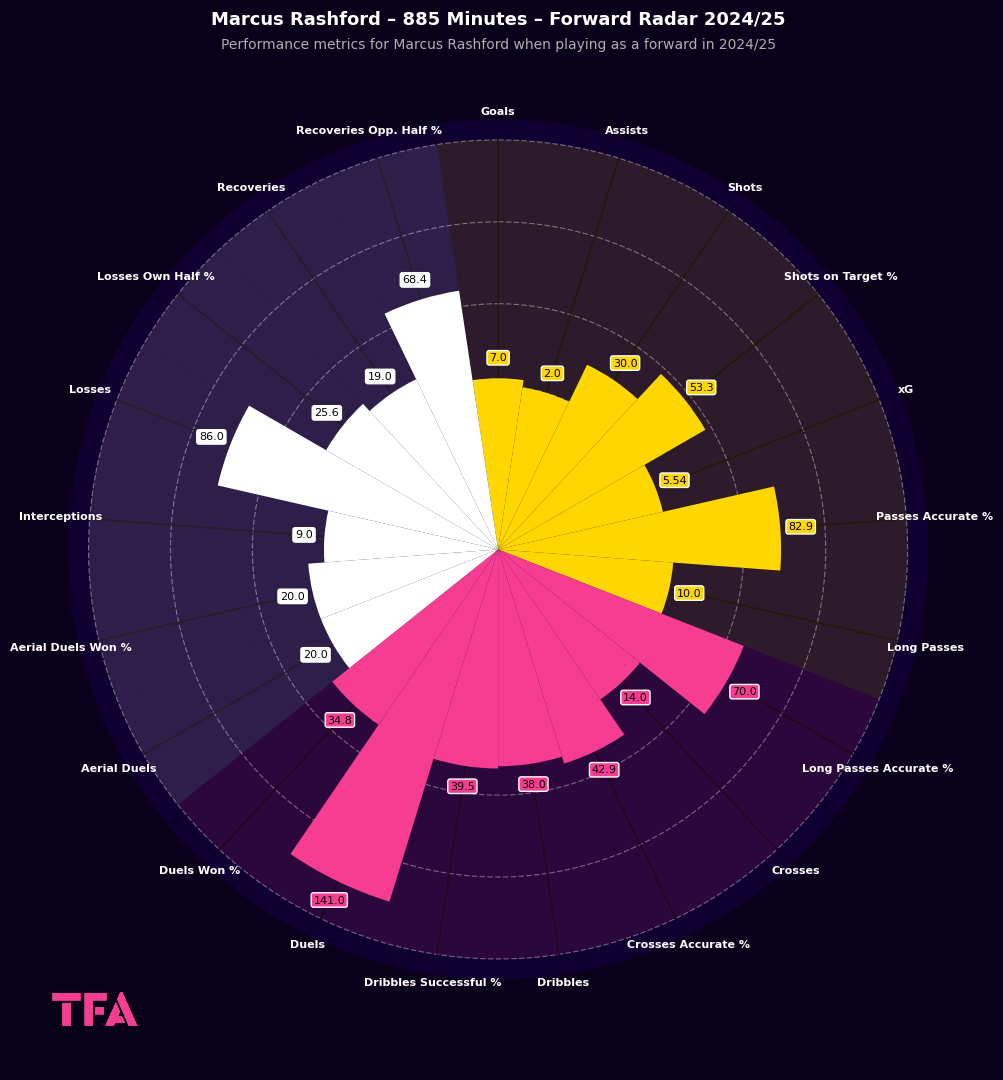

In [14]:

data = {
    "Metric": [
        "Goals", "Assists", "Shots",
        "Shots on Target %", "xG", "Passes Accurate %",
        "Long Passes", "Long Passes Accurate %", "Crosses", "Crosses Accurate %",
        "Dribbles", "Dribbles Successful %", "Duels", "Duels Won %",
        "Aerial Duels", "Aerial Duels Won %", "Interceptions", "Losses",
        "Losses Own Half %", "Recoveries", "Recoveries Opp. Half %"
    ],
    "Value": [
        7, 2, 30,
        53.30, 5.54, 82.90,
        10, 70.0, 14, 42.90,
        38, 39.50, 141, 34.80,
        20, 20.0, 9, 86,
        25.60, 19, 68.40
    ]
}

df = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFD700"] * block_size +
    ["#F73D92"] * block_size +
    ["#FFFFFF"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Marcus Rashford – 885 Minutes – Forward Radar 2024/25",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Performance metrics for Marcus Rashford when playing as a forward in 2024/25",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()


Barcelona Forwards vs Rashford – Per 90 Stats Comparison (2024/25)

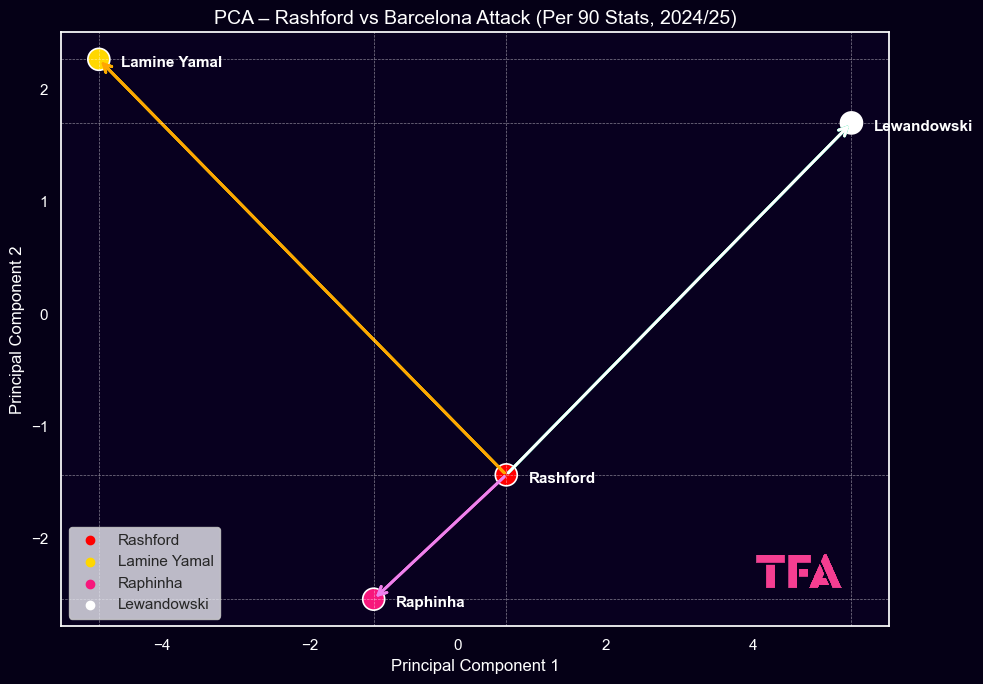

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

data = {
    'Player': ['Rashford', 'Lamine Yamal', 'Raphinha', 'Lewandowski'],
    'Minutes': [2516, 3770, 5109, 4213],
    '90s': [27.9, 41.8, 56.7, 46.8],
    'Goals': [11, 13, 34, 42],
    'Assists': [7, 17, 21, 2],
    'Shots': [68, 164, 192, 144],
    'Shots on target %': [44.1, 37.8, 42.2, 47.9],
    'xG': [9.38, 15.57, 23.82, 39.45],
    'Passes': [838, 1771, 2058, 791],
    'Passes accurate %': [77.9, 77.2, 77.0, 76.7],
    'Long passes': [54, 90, 129, 32],
    'Long passes accurate %': [44.4, 47.8, 55.0, 59.4],
    'Crosses': [70, 150, 194, 15],
    'Crosses accurate %': [35.7, 35.7, 35.7, 35.7],
    'Dribbles': [134, 498, 176, 53],
    'Dribbles successful %': [47.8, 55.2, 53.4, 43.4],
    'Duels': [392, 1007, 619, 710],
    'Duels won %': [39.3, 47.4, 45.7, 34.8],
    'Aerial duels': [37, 6, 35, 166],
    'Aerial duels won %': [35.1, 16.7, 54.3, 42.2],
    'Interceptions': [43, 57, 131, 65],
    'Losses': [262, 566, 623, 442],
    'Losses own half %': [23.7, 14.7, 16.2, 21.9],
    'Recoveries': [75, 133, 174, 115],
    'Recoveries opp. half %': [68, 73.7, 67.2, 69.6]
}

df = pd.DataFrame(data)

per_90_cols = [
    'Goals', 'Assists', 'Shots', 'xG', 'Passes', 'Long passes',
    'Crosses', 'Dribbles', 'Duels', 'Aerial duels', 'Interceptions',
    'Losses', 'Recoveries'
]

for col in per_90_cols:
    df[col + ' per 90'] = df[col] / df['90s']

pca_cols = [col + ' per 90' for col in per_90_cols] + [
    'Shots on target %', 'Passes accurate %', 'Long passes accurate %',
    'Crosses accurate %', 'Dribbles successful %', 'Duels won %',
    'Aerial duels won %', 'Losses own half %', 'Recoveries opp. half %'
]

X = df[pca_cols].copy()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
sns.set(style='dark')
palette = {'Rashford': 'red', 'Lamine Yamal': '#FFD700', 'Raphinha': "#F7177C", 'Lewandowski': '#FFFFFF'}
ax = sns.scatterplot(x='PC1', y='PC2', data=df, hue='Player', palette=palette, s=250, linewidth=1.2)

for i in range(df.shape[0]):
    plt.text(df['PC1'][i]+0.3, df['PC2'][i]-0.07, df['Player'][i], fontsize=11, color='white', weight='bold')

stat_arrows = {
    'Goals': ('Lamine Yamal', 'yellow'),
    'xG': ('Lamine Yamal', 'gold'),
    'Assists': ('Raphinha', '#F73D92'),
    'Passes': ('Raphinha', 'orchid'),
    'Crosses': ('Lamine Yamal', 'orange'),
    'Dribbles': ('Raphinha', 'violet'),
    'Shots': ('Lewandowski', 'lightblue'),
    'Shots on target %': ('Lewandowski', 'cyan'),
    'Interceptions': ('Lewandowski', 'lightgreen'),
    'Recoveries opp. half %': ('Lewandowski', 'white')
}

rashford_coords = df[df['Player'] == 'Rashford'][['PC1', 'PC2']].values[0]
for stat, (target_player, color) in stat_arrows.items():
    target_coords = df[df['Player'] == target_player][['PC1', 'PC2']].values[0]
    arrow = FancyArrowPatch(
        posA=rashford_coords,
        posB=target_coords,
        arrowstyle='->',
        color=color,
        linewidth=2,
        mutation_scale=15
    )
    ax.add_patch(arrow)

plt.gca().set_facecolor("#08001F")
plt.gcf().patch.set_facecolor("#050016")
plt.title('PCA – Rashford vs Barcelona Attack (Per 90 Stats, 2024/25)', fontsize=14, color='white')
plt.xlabel('Principal Component 1', color='white')
plt.ylabel('Principal Component 2', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(loc='lower left', frameon=True)
plt.tight_layout()

for i in range(df.shape[0]):
    x = df['PC1'][i]
    y = df['PC2'][i]
    ax.axhline(y=y, color='white', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.axvline(x=x, color='white', linestyle='--', linewidth=0.5, alpha=0.5)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.854, 0.081), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    plt.gca().add_artist(ab)

plt.show()